In [4]:
import numpy as np
import pandas as pd
import rasterio
from scipy.interpolate import griddata
from tqdm import tqdm
import os

# Parameters
input_folder = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_time/daily_rasters_tif'  # Folder with GeoTIFFs
lon_min, lon_max = 10, 40
lat_min, lat_max = 5, 20
resolution = 0.05  # Raster resolution
earth_radius = 6371  # Earth's radius in km

# Generate grid coordinates
lon_grid = np.arange(lon_min, lon_max, resolution)
lat_grid = np.arange(lat_min, lat_max, resolution)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Calculate pixel area (in km²)
pixel_area = (
    (resolution * np.pi / 180) *  # Longitude width in radians
    (resolution * np.pi / 180) *  # Latitude height in radians
    earth_radius**2 * np.cos(np.radians(lat_mesh))
)  # Latitude correction

In [5]:
# Process each day's raster
results = []
tif_files = sorted(
    [f for f in os.listdir(input_folder) if f.endswith('.tif')]
)

for tif_file in tqdm(tif_files, desc="Calculating water body area dynamics"):
    # Read GeoTIFF
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band

    # Calculate water body area (km²) for each pixel
    water_body_area = np.nan_to_num(water_fraction) * pixel_area

    # Sum water body area for this day
    total_water_area = np.nansum(water_body_area)

    # Extract date from file name
    date_str = tif_file.split('_')[-1].split('.')[0]  # Assuming format like water_fraction_YYYYMMDD.tif
    results.append({"date": pd.to_datetime(date_str), "water_area_km2": total_water_area})

Calculating water body area dynamics: 100%|████████████████████████████████████████| 365/365 [00:17<00:00, 21.29it/s]

Water body area dynamics calculated and saved to 'water_body_area_dynamics.csv'.


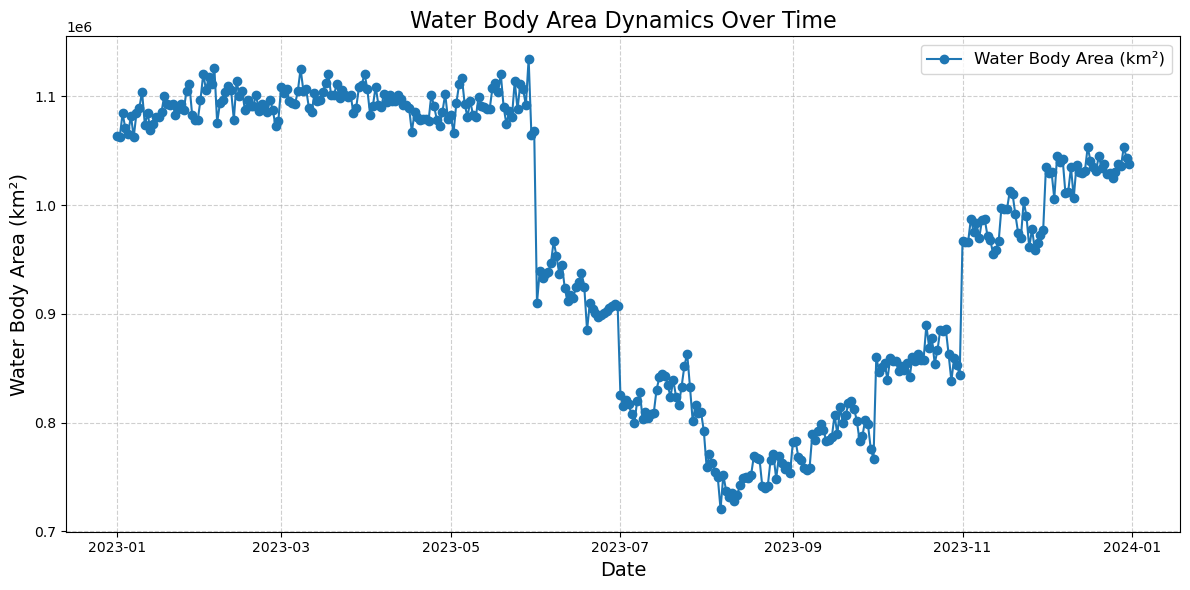

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Save results to a DataFrame and CSV
df_results = pd.DataFrame(results)
df_results.sort_values("date", inplace=True)
df_results.to_csv("water_body_area_dynamics.csv", index=False)

# Plot the water body area dynamics
plt.figure(figsize=(12, 6))
plt.plot(df_results["date"], df_results["water_area_km2"], marker='o', linestyle='-', label="Water Body Area (km²)")
plt.title("Water Body Area Dynamics Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Water Body Area (km²)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Calculating deviation dynamics: 100%|██████████████████████████████████████████████| 365/365 [00:05<00:00, 70.13it/s]


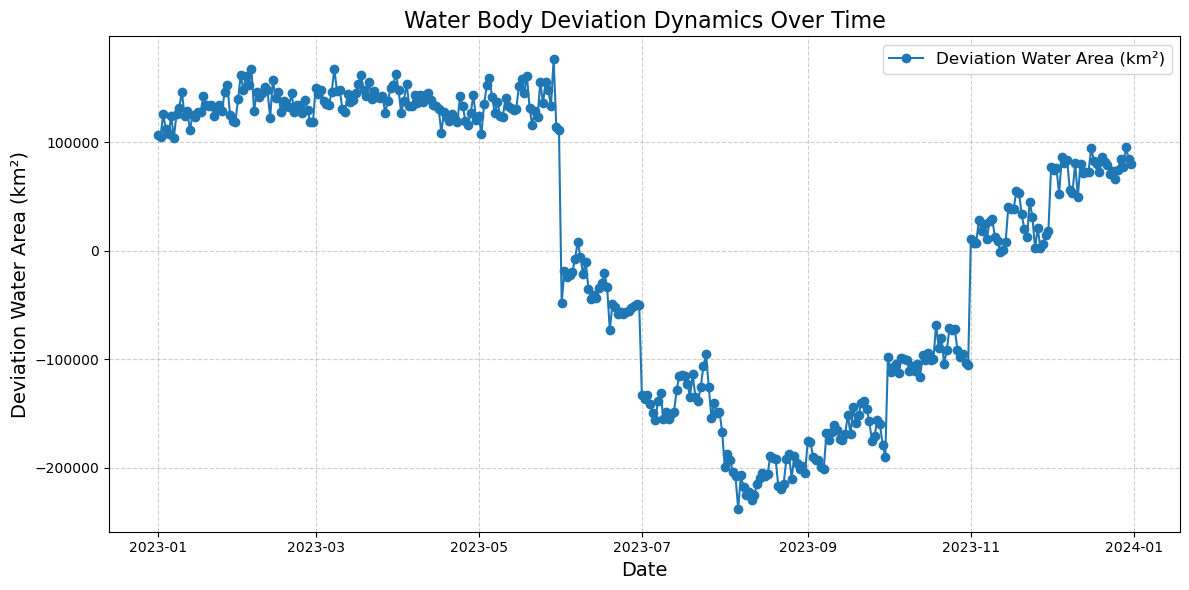

In [7]:
import numpy as np
import pandas as pd
import rasterio
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

# Parameters
input_folder = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_time/daily_rasters_tif'  # Folder with GeoTIFFs
lon_min, lon_max = 10, 40
lat_min, lat_max = 5, 20
resolution = 0.05  # Raster resolution
earth_radius = 6371  # Earth's radius in km

# Generate grid coordinates
lon_grid = np.arange(lon_min, lon_max, resolution)
lat_grid = np.arange(lat_min, lat_max, resolution)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Calculate pixel area (in km²)
pixel_area = (
    (resolution * np.pi / 180) *  # Longitude width in radians
    (resolution * np.pi / 180) *  # Latitude height in radians
    earth_radius**2 * np.cos(np.radians(lat_mesh))
)  # Latitude correction

# Load all raster data to calculate median fraction
all_fractions = []
tif_files = sorted(
    [f for f in os.listdir(input_folder) if f.endswith('.tif')]
)

for tif_file in tqdm(tif_files, desc="Loading water fraction data"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
        all_fractions.append(np.nan_to_num(water_fraction))

# Stack fractions to calculate median fraction
stacked_fractions = np.stack(all_fractions, axis=0)
median_fraction = np.median(stacked_fractions, axis=0)

# Process each day's raster for deviation
results = []
for i, tif_file in tqdm(enumerate(tif_files), total=len(tif_files), desc="Calculating deviation dynamics"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
    
    # Calculate deviation from median
    deviation_fraction = water_fraction - median_fraction

    # Calculate deviation area (km²) for each pixel
    deviation_area = deviation_fraction * pixel_area

    # Sum deviation area for this day
    total_deviation_area = np.nansum(deviation_area)

    # Extract date from file name
    date_str = tif_file.split('_')[-1].split('.')[0]  # Assuming format like water_fraction_YYYYMMDD.tif
    results.append({"date": pd.to_datetime(date_str), "deviation_area_km2": total_deviation_area})


# Plot the deviation dynamics
plt.figure(figsize=(12, 6))
plt.plot(df_results["date"], df_results["deviation_area_km2"], marker='o', linestyle='-', label="Deviation Water Area (km²)")
plt.title("Water Body Deviation Dynamics Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Deviation Water Area (km²)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Calculating deviation dynamics: 100%|█████████████████████████████████████████████| 365/365 [00:02<00:00, 175.25it/s]


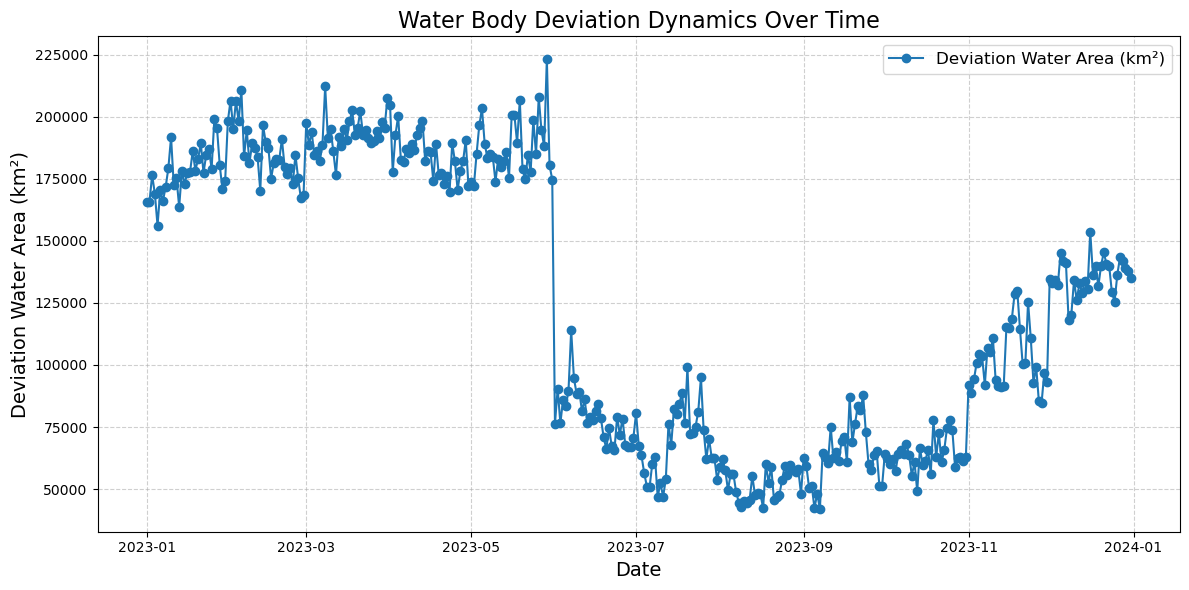

In [24]:
import numpy as np
import pandas as pd
import rasterio
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

# Parameters
input_folder = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_time/daily_rasters_tif'  # Folder with GeoTIFFs
lon_min, lon_max = 10, 40
lat_min, lat_max = 5, 20
resolution = 0.05  # Raster resolution
earth_radius = 6371  # Earth's radius in km

# Generate grid coordinates
lon_grid = np.arange(lon_min, lon_max, resolution)
lat_grid = np.arange(lat_min, lat_max, resolution)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Calculate pixel area (in km²)
pixel_area = (
    (resolution * np.pi / 180) *  # Longitude width in radians
    (resolution * np.pi / 180) *  # Latitude height in radians
    earth_radius**2 * np.cos(np.radians(lat_mesh))
)  # Latitude correction

# Load all raster data to calculate median fraction
all_fractions = []
tif_files = sorted(
    [f for f in os.listdir(input_folder) if f.endswith('.tif')]
)

for tif_file in tqdm(tif_files, desc="Loading water fraction data"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
        all_fractions.append(np.nan_to_num(water_fraction))

# Stack fractions to calculate median fraction
stacked_fractions = np.stack(all_fractions, axis=0)
# median_fraction = np.median(stacked_fractions, axis=0)
median_fraction = np.percentile(stacked_fractions, 80, axis=0)

# Process each day's raster for deviation
results = []
for i, tif_file in tqdm(enumerate(tif_files), total=len(tif_files), desc="Calculating deviation dynamics"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
    
    # Calculate deviation from median
    deviation_fraction = water_fraction - median_fraction

    # Calculate deviation area (km²) for each pixel
    deviation_area = deviation_fraction * pixel_area

    # Sum deviation area for this day
    total_deviation_area = np.nansum(deviation_area)

    # Extract date from file name
    date_str = tif_file.split('_')[-1].split('.')[0]  # Assuming format like water_fraction_YYYYMMDD.tif
    results.append({"date": pd.to_datetime(date_str), "deviation_area_km2": total_deviation_area})


# Plot the deviation dynamics
plt.figure(figsize=(12, 6))
plt.plot(df_results["date"], df_results["deviation_area_km2"], marker='o', linestyle='-', label="Deviation Water Area (km²)")
plt.title("Water Body Deviation Dynamics Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Deviation Water Area (km²)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Calculating deviation dynamics: 100%|█████████████████████████████████████████████| 365/365 [00:02<00:00, 164.34it/s]


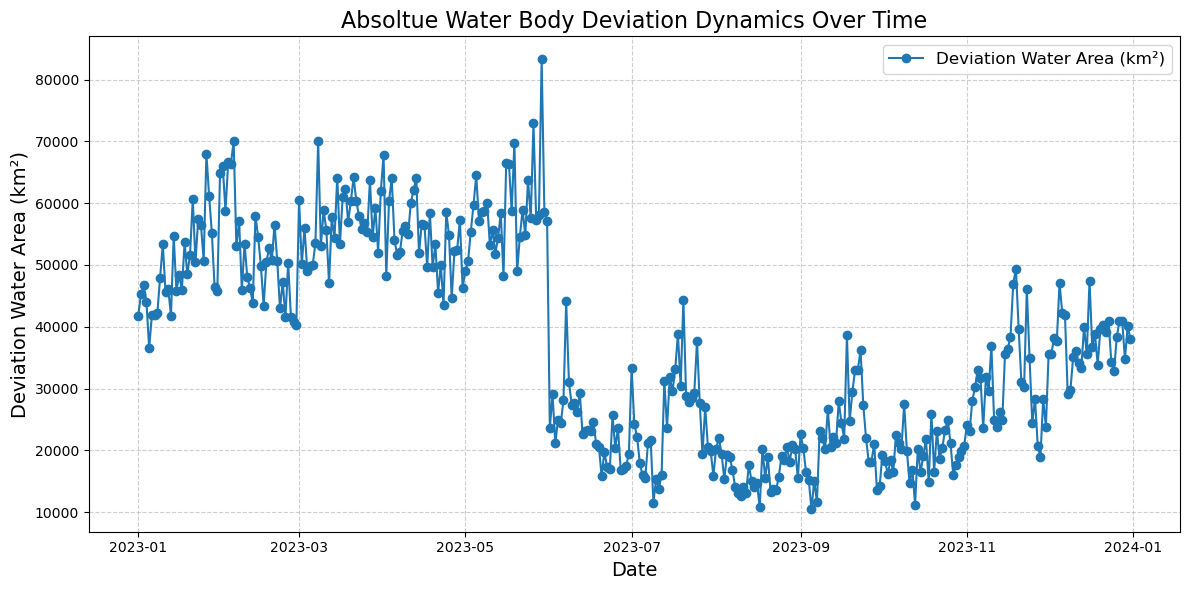

In [28]:
import numpy as np
import pandas as pd
import rasterio
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

# Parameters
input_folder = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_time/daily_rasters_tif'  # Folder with GeoTIFFs
lon_min, lon_max = 10, 40
lat_min, lat_max = 5, 20
resolution = 0.05  # Raster resolution
earth_radius = 6371  # Earth's radius in km

# Generate grid coordinates
lon_grid = np.arange(lon_min, lon_max, resolution)
lat_grid = np.arange(lat_min, lat_max, resolution)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Calculate pixel area (in km²)
pixel_area = (
    (resolution * np.pi / 180) *  # Longitude width in radians
    (resolution * np.pi / 180) *  # Latitude height in radians
    earth_radius**2 * np.cos(np.radians(lat_mesh))
)  # Latitude correction

# Load all raster data to calculate median fraction
all_fractions = []
tif_files = sorted(
    [f for f in os.listdir(input_folder) if f.endswith('.tif')]
)

for tif_file in tqdm(tif_files, desc="Loading water fraction data"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
        all_fractions.append(np.nan_to_num(water_fraction))

# Stack fractions to calculate median fraction
stacked_fractions = np.stack(all_fractions, axis=0)
#median_fraction = np.median(stacked_fractions, axis=0)
median_fraction = np.percentile(stacked_fractions, 80, axis=0)

# Process each day's raster for deviation
results = []
for i, tif_file in tqdm(enumerate(tif_files), total=len(tif_files), desc="Calculating deviation dynamics"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
    
    # Calculate deviation from median
    deviation_fraction = abs(water_fraction - median_fraction)

    # Calculate deviation area (km²) for each pixel
    deviation_area = deviation_fraction * pixel_area

    # Sum deviation area for this day
    total_deviation_area = np.nansum(deviation_area)

    # Extract date from file name
    date_str = tif_file.split('_')[-1].split('.')[0]  # Assuming format like water_fraction_YYYYMMDD.tif
    results.append({"date": pd.to_datetime(date_str), "deviation_area_km2": total_deviation_area})


# Plot the deviation dynamics
plt.figure(figsize=(12, 6))
plt.plot(df_results["date"], df_results["deviation_area_km2"], marker='o', linestyle='-', label="Deviation Water Area (km²)")
plt.title("Absoltue Water Body Deviation Dynamics Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Deviation Water Area (km²)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Calculating deviation dynamics: 100%|██████████████████████████████████████████████| 365/365 [00:14<00:00, 25.73it/s]


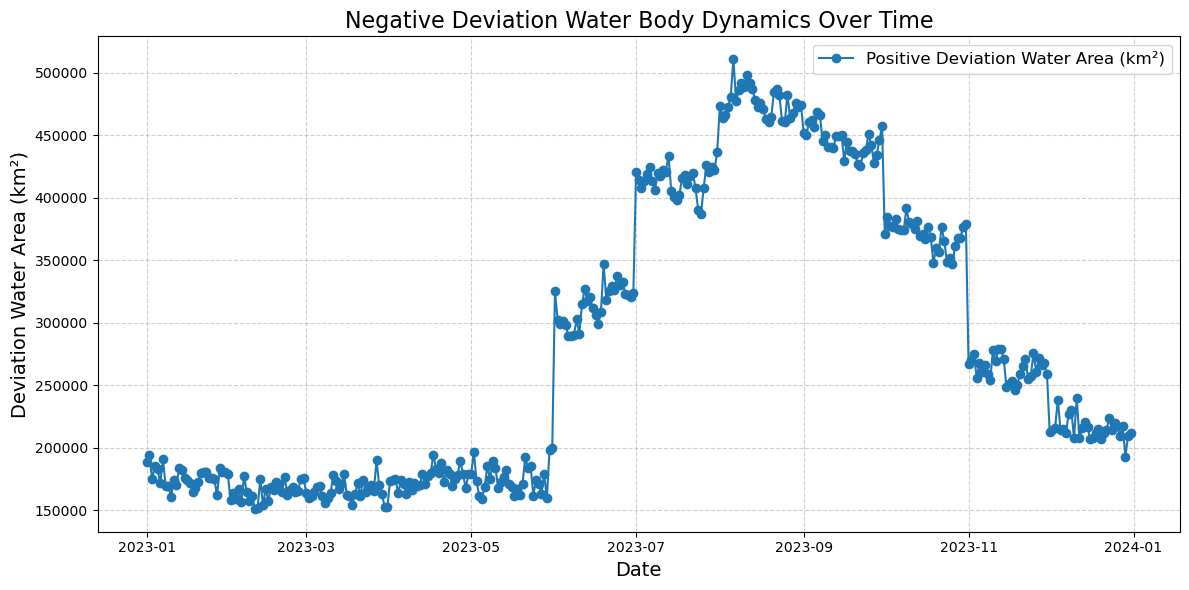

In [35]:
# Process each day's raster for deviation
results = []
for i, tif_file in tqdm(enumerate(tif_files), total=len(tif_files), desc="Calculating deviation dynamics"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
    
    # Calculate deviation from median
    deviation_fraction = water_fraction - median_fraction

    # Filter for deviation < 0
    positive_deviation = np.where(deviation_fraction < 0, deviation_fraction, 0)

    # Calculate deviation area (km²) for each pixel
    deviation_area = -positive_deviation * pixel_area

    # Sum deviation area for this day
    total_deviation_area = np.nansum(deviation_area)

    # Extract date from file name
    date_str = tif_file.split('_')[-1].split('.')[0]  # Assuming format like water_fraction_YYYYMMDD.tif
    results.append({"date": pd.to_datetime(date_str), "deviation_area_km2": total_deviation_area})

# Save results to a DataFrame and plot
df_results = pd.DataFrame(results)
df_results.sort_values("date", inplace=True)

# Plot the deviation dynamics (positive only)
plt.figure(figsize=(12, 6))
plt.plot(df_results["date"], df_results["deviation_area_km2"], marker='o', linestyle='-', label="Positive Deviation Water Area (km²)")
plt.title("Negative Deviation Water Body Dynamics Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Deviation Water Area (km²)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Calculating deviation dynamics: 100%|██████████████████████████████████████████████| 365/365 [00:04<00:00, 74.43it/s]


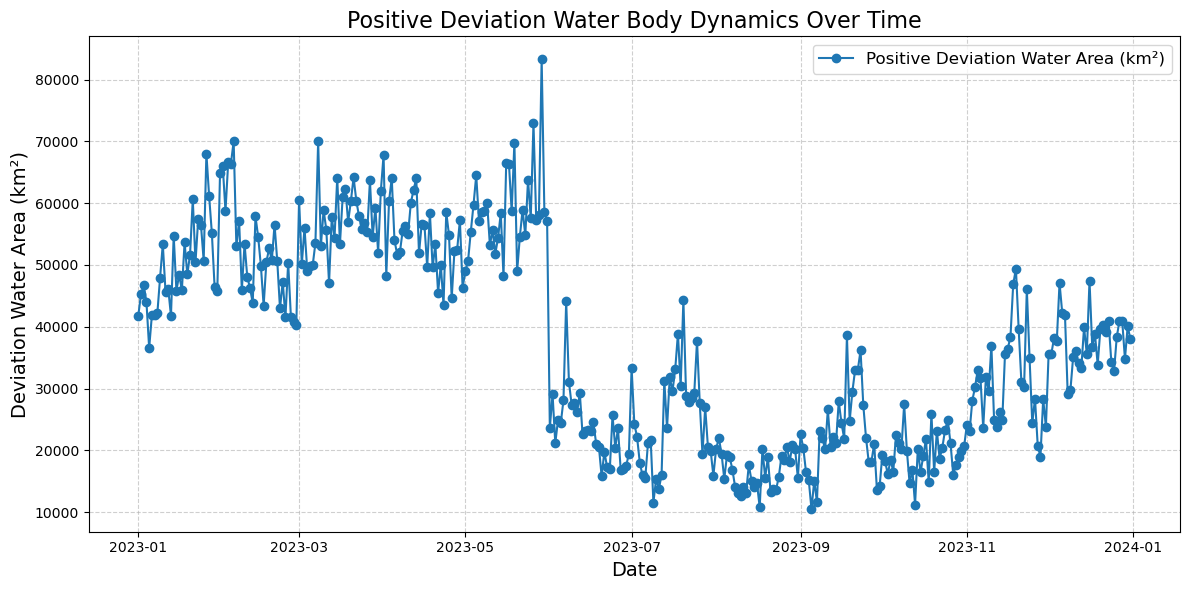

In [30]:
# Process each day's raster for deviation
results = []
for i, tif_file in tqdm(enumerate(tif_files), total=len(tif_files), desc="Calculating deviation dynamics"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
    
    # Calculate deviation from median
    deviation_fraction = water_fraction - median_fraction

    # Filter for deviation > 0
    positive_deviation = np.where(deviation_fraction > 0, deviation_fraction, 0)

    # Calculate deviation area (km²) for each pixel
    deviation_area = positive_deviation * pixel_area

    # Sum deviation area for this day
    total_deviation_area = np.nansum(deviation_area)

    # Extract date from file name
    date_str = tif_file.split('_')[-1].split('.')[0]  # Assuming format like water_fraction_YYYYMMDD.tif
    results.append({"date": pd.to_datetime(date_str), "deviation_area_km2": total_deviation_area})

# Save results to a DataFrame and plot
df_results = pd.DataFrame(results)
df_results.sort_values("date", inplace=True)

# Plot the deviation dynamics (positive only)
plt.figure(figsize=(12, 6))
plt.plot(df_results["date"], df_results["deviation_area_km2"], marker='o', linestyle='-', label="Positive Deviation Water Area (km²)")
plt.title("Positive Deviation Water Body Dynamics Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Deviation Water Area (km²)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Calculating deviation dynamics: 100%|█████████████████████████████████████████████| 365/365 [00:02<00:00, 179.72it/s]


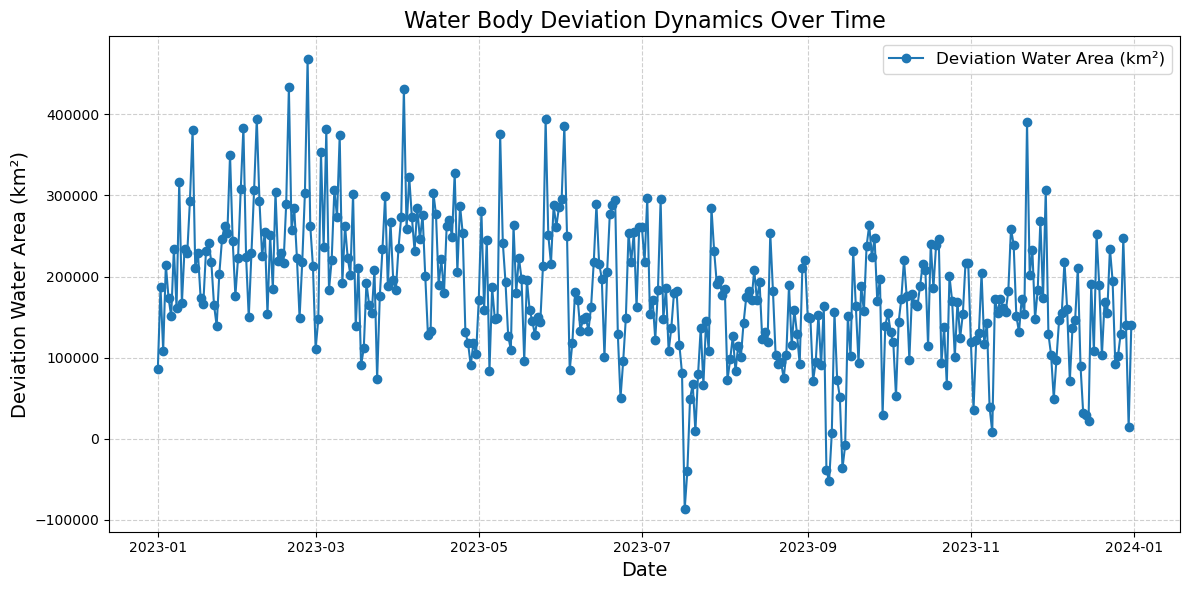

In [18]:
import numpy as np
import pandas as pd
import rasterio
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

# Parameters
input_folder = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/daily_rasters_tif'  # Folder with GeoTIFFs
lon_min, lon_max = 10, 40
lat_min, lat_max = 5, 20
resolution = 0.05  # Raster resolution
earth_radius = 6371  # Earth's radius in km

# Generate grid coordinates
lon_grid = np.arange(lon_min, lon_max, resolution)
lat_grid = np.arange(lat_min, lat_max, resolution)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Calculate pixel area (in km²)
pixel_area = (
    (resolution * np.pi / 180) *  # Longitude width in radians
    (resolution * np.pi / 180) *  # Latitude height in radians
    earth_radius**2 * np.cos(np.radians(lat_mesh))
)  # Latitude correction

# Load all raster data to calculate median fraction
all_fractions = []
tif_files = sorted(
    [f for f in os.listdir(input_folder) if f.endswith('.tif')]
)

for tif_file in tqdm(tif_files, desc="Loading water fraction data"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
        all_fractions.append(np.nan_to_num(water_fraction))

# Stack fractions to calculate median fraction
stacked_fractions = np.stack(all_fractions, axis=0)
median_fraction = np.median(stacked_fractions, axis=0)

# Process each day's raster for deviation
results = []
for i, tif_file in tqdm(enumerate(tif_files), total=len(tif_files), desc="Calculating deviation dynamics"):
    with rasterio.open(f"{input_folder}/{tif_file}") as src:
        water_fraction = src.read(1)  # First band
    
    # Calculate deviation from median
    deviation_fraction = water_fraction - median_fraction

    # Calculate deviation area (km²) for each pixel
    deviation_area = deviation_fraction * pixel_area

    # Sum deviation area for this day
    total_deviation_area = np.nansum(deviation_area)

    # Extract date from file name
    date_str = tif_file.split('_')[-1].split('.')[0]  # Assuming format like water_fraction_YYYYMMDD.tif
    results.append({"date": pd.to_datetime(date_str), "deviation_area_km2": total_deviation_area})

# Save results to a DataFrame
df_results = pd.DataFrame(results)

# Ensure DataFrame has the expected columns
if "date" not in df_results or "deviation_area_km2" not in df_results:
    raise ValueError("The required columns ('date' and 'deviation_area_km2') are missing in df_results.")

# Sort the DataFrame by date
df_results.sort_values("date", inplace=True)

# Plot the deviation dynamics
plt.figure(figsize=(12, 6))
plt.plot(df_results["date"], df_results["deviation_area_km2"], marker='o', linestyle='-', label="Deviation Water Area (km²)")
plt.title("Water Body Deviation Dynamics Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Deviation Water Area (km²)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()